In [40]:
import pandas as pd 
import numpy as np 
from scipy import stats
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import xgboost as xgb
from xgboost import XGBClassifier 
from xgboost import XGBRegressor
from xgboost import plot_importance
import matplotlib.pylab as plt
from matplotlib import pyplot
import mlxtend
import warnings
import os
from sklearn.metrics import r2_score
from pylab import rcParams
rcParams['figure.figsize'] = 8, 16
from matplotlib import pyplot as plt
plt.figure(figsize=(8,16))
warnings.filterwarnings('ignore')
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"
%matplotlib inline

In [20]:
data = pd.read_csv('./Sample1.csv')
data.head()

,Unnamed: 0,Innings,Bat Team,Total Runs*,Run rate*,Wickets*,Total balls*,VenueAvg,TotalRunsInning,FirstInningScore
0,0,1,Pakistan,0,0.0,0,1,268.452213,248,-1
1,1,1,Pakistan,0,0.0,0,2,268.452213,248,-1
2,2,1,Pakistan,0,0.0,0,3,268.452213,248,-1
3,3,1,Pakistan,0,0.0,0,4,268.452213,248,-1
4,4,1,Pakistan,0,0.0,0,5,268.452213,248,-1


In [21]:
feature_cols = [
 'Innings',
#  'Bat Team',
 'Total Runs*',
 'Run rate*',
 'Wickets*',
 'Total balls*',
    'VenueAvg',
#     'TotalRunsInning',
#     'FirstInningScore'
]
target_cols =['TotalRunsInning']

features_X = data[feature_cols]
Y = data[target_cols]

In [47]:
model = XGBRegressor(
    learning_rate =0.01, 
    n_estimators=1000, 
    max_depth=20,
    min_child_weight=0, 
    gamma=0.01, 
    subsample=0.81, 
    colsample_bytree=0.22,
    nthread=2, 
    scale_pos_weight=1, 
    seed=42,
    reg_alpha = 0.1, 
    reg_lambda = 0.1
)

kfold = KFold(n_splits=3, random_state=42)
results = cross_val_score(model, features_X[features_X['Total balls*']>200], Y[features_X['Total balls*']>200], cv=kfold,verbose=50)
print(results)
print(results.mean())
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV]  ................................................................
[CV] ....................... , score=0.7840388845383465, total=  16.6s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.6s remaining:    0.0s
[CV]  ................................................................
[CV] ....................... , score=0.8065897074674894, total=  15.9s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   32.5s remaining:    0.0s
[CV]  ................................................................
[CV] ....................... , score=0.7945863442310773, total=  15.9s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   48.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   48.4s finished
[0.78403888 0.80658971 0.79458634]
0.7950716454123045
Accuracy: 79.51% (0.92%)


In [45]:
gs = GridSearchCV(estimator=XGBRegressor(
    learning_rate =0.01, 
    n_estimators=500, 
    max_depth=40,
    min_child_weight=0, 
    gamma=0.01, 
    subsample=0.82, 
    colsample_bytree=0.22,
    nthread=-1, 
    scale_pos_weight=1, 
    seed=42,
    reg_alpha = 0.1, 
    reg_lambda = 0.1
),
                  param_grid=[{'n_estimators': [500]}],
                  cv=3
                 )



gs.fit(features_X,Y)

gs.cv_results_, gs.best_params_, gs.best_score_

({'mean_fit_time': array([27.64036322]),
  'std_fit_time': array([0.0789096]),
  'mean_score_time': array([1.88074183]),
  'std_score_time': array([0.0433599]),
  'param_n_estimators': masked_array(data=[500],
               mask=[False],
         fill_value='?',
              dtype=object),
  'params': [{'n_estimators': 500}],
  'split0_test_score': array([0.35326547]),
  'split1_test_score': array([0.39052996]),
  'split2_test_score': array([0.36897231]),
  'mean_test_score': array([0.37092259]),
  'std_test_score': array([0.01527558]),
  'rank_test_score': array([1], dtype=int32),
  'split0_train_score': array([0.52908671]),
  'split1_train_score': array([0.5074061]),
  'split2_train_score': array([0.53377634]),
  'mean_train_score': array([0.52342305]),
  'std_train_score': array([0.01148637])},
 {'n_estimators': 500},
 0.3709225902983674)

In [25]:
dataTest = pd.read_csv('./Sample1Graph.csv')
XTest = dataTest[feature_cols]
YTest = dataTest[target_cols]
dataTest.head()


,Innings,Bat Team,Total Runs*,Run rate*,Wickets*,Total balls*,VenueAvg,TotalRunsInning,FirstInningScore
0,1,Sri Lanka,1,6.0,0,1,283.878938,265,-1
1,1,Sri Lanka,3,9.0,0,2,283.878938,265,-1
2,1,Sri Lanka,3,6.0,0,3,283.878938,265,-1
3,1,Sri Lanka,4,6.0,0,4,283.878938,265,-1
4,1,Sri Lanka,4,4.8,0,5,283.878938,265,-1


In [22]:
model.fit( features_X[features_X['Total balls*']>120], Y[features_X['Total balls*']>120])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.22, gamma=0.01, learning_rate=0.01,
       max_delta_step=0, max_depth=40, min_child_weight=0, missing=None,
       n_estimators=1000, n_jobs=1, nthread=2, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=42, silent=True, subsample=0.81)

In [27]:
pred = model.predict( XTest[XTest['Total balls*']>120])
print(pred)

[253.17027 255.83694 256.48193 258.95786 256.23276 246.83296 246.30542
 247.62808 254.12056 251.18533 250.96425 254.18414 248.38133 250.47946
 250.58852 251.72083 254.55746 253.24634 249.98065 249.83807 256.18637
 253.89336 253.93327 262.71243 263.74597 263.17285 262.44464 261.9412
 262.3439  268.75473 268.71222 267.52582 267.19543 269.05582 270.4555
 267.259   267.0697  269.5602  270.41925 271.21347 270.48575 272.40417
 270.24792 269.50317 268.92813 269.15765 268.51614 269.1789  267.78613
 270.7543  271.69562 269.64706 270.76807 270.18585 268.06494 267.2638
 269.6517  269.9214  270.09622 269.98138 271.69772 272.27502 276.89688
 274.0466  273.21796 274.6258  273.86118 274.1803  276.71716 278.6996
 279.7787  278.56482 278.9934  274.63983 279.62982 278.48965 275.9456
 275.28195 276.91168 280.38715 281.51935 281.2413  281.12137 281.62265
 280.5321  280.9367  280.57593 280.87466 283.089   286.30927 288.7606
 289.49017 288.0071  288.51224 288.54037 290.32367 290.94183 290.89615
 290.47742 2

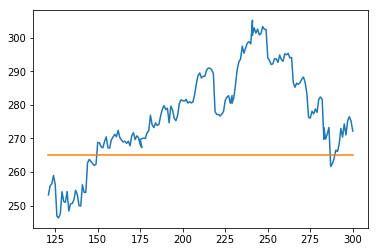

In [43]:
plt.plot(XTest[XTest['Total balls*']>120]['Total balls*'],pred)
plt.plot(XTest[XTest['Total balls*']>120]['Total balls*'],YTest[XTest['Total balls*']>120])
plt.show()